<a href="https://colab.research.google.com/github/Fatmaaai/AGF-x-ZAKA-Coursework/blob/main/Mask_Detection/Computer%20Vision-%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mask Detection

© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this project is to build a model that can detect whether a person is wearing a mask or not. You would be downloading the data from kaggle and then building you model while we guide you through the steps.


##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset What you will have to do, is to search for a way that allows you to download the dataset from kaggle directly into google colab (or your google drive). This process would save you the trouble from downloading the dataset locally and then uploading it to use it in colab.

In [ ]:
#Do your Research
#Test Your Zaka
!pip install opendatasets
!pip install pandas

import opendatasets as od
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Fatma Egal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:00<00:00, 210MB/s]


Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it. Here you have the option of unzipping it in the environment or in your google drive.

In [ ]:
#Test Your Zaka (the file unzipped with download)
#import zipfile

#zip_file_path = "face-mask-dataset.zip"
# unzip_dir = "face-mask-dataset"

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # zip_ref.extractall(unzip_dir)

##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** and the **shutil** libraries that would help you creating folders, and moving images from a folder to another. In simple terms, the libraries helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
#Test Your Zaka --- Create the Train, Validation and Testing Folder
main_dir = "face-mask-dataset/data"
final_dir = "final_facemask_dataset"
splits = ["train", "validation", "test"]
categories = ["with_mask", "without_mask"]

os.makedirs(final_dir, exist_ok=True)

In [ ]:
#Test Your Zaka --- Create the classes folders inside of each folder you created above
for split in splits:
    for category in categories:
        folder_path = os.path.join(final_dir, split, category)
        os.makedirs(folder_path, exist_ok=True)

In [ ]:
#Test Your Zaka --- For each class, take the images, and select 500 samples for training and 100 for evaluation, and 50 for testing
source_dir = "face-mask-dataset/data"
final_dir = "final_facemask_dataset"
splits = ["train", "validation", "test"]
categories = ["with_mask", "without_mask"]
split_counts = {"train": 500, "validation": 100, "test": 50}


for split in splits:
    for category in categories:
        os.makedirs(os.path.join(final_dir, split, category), exist_ok=True)


for category in categories:
    category_path = os.path.join(source_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)

    start_idx = 0
    for split in splits:
        count = split_counts[split]
        selected_images = images[start_idx:start_idx + count]
        start_idx += count

        target_folder = os.path.join(final_dir, split, category)
        for img in selected_images:
            shutil.copy(os.path.join(category_path, img), os.path.join(target_folder, img))


##Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
#Test Your Zaka
training_path = 'final_facemask_dataset/train'
validation_path = 'final_facemask_dataset/validation'
testing_path = 'final_facemask_dataset/test'

To make sure that everythinh went correctly, write a code that counts the number of images that you have in your training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
#Test Your Zaka
with_mask_count = len(os.listdir(os.path.join(training_path, 'with_mask')))
without_mask_count = len(os.listdir(os.path.join(training_path, 'without_mask')))

print("Number of 'with_mask' images:", with_mask_count)
print("Number of 'without_mask' images:", without_mask_count)

Number of 'with_mask' images: 936
Number of 'without_mask' images: 922


Do the same for the validation and the testing folders

In [ ]:
#Test Your Zaka
with_mask_count = len(os.listdir(os.path.join(validation_path, 'with_mask')))
without_mask_count = len(os.listdir(os.path.join(validation_path, 'without_mask')))

print("Number of 'with_mask' images:", with_mask_count)
print("Number of 'without_mask' images:", without_mask_count)

Number of 'with_mask' images: 198
Number of 'without_mask' images: 200


In [ ]:
#Test Your Zaka
with_mask_count = len(os.listdir(os.path.join(testing_path, 'with_mask')))
without_mask_count = len(os.listdir(os.path.join(testing_path, 'without_mask')))

print("Number of 'with_mask' images:", with_mask_count)
print("Number of 'without_mask' images:", without_mask_count)

Number of 'with_mask' images: 100
Number of 'without_mask' images: 97


Write a code that shows 5 random images for people with mask from your training set.

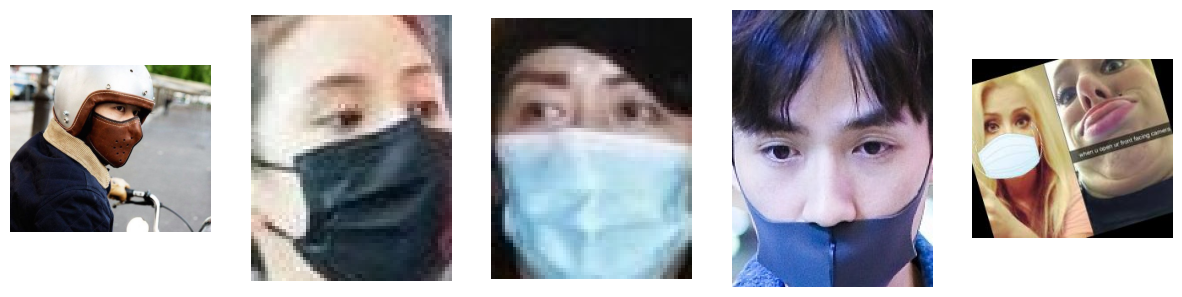

In [ ]:
#Test Your Zaka
import matplotlib.image as mpimg


with_mask_dir = os.path.join(training_path, 'with_mask')
image_files = os.listdir(with_mask_dir)
random_image_files = random.sample(image_files, 5)

plt.figure(figsize=(15, 10))
for i, image_file in enumerate(random_image_files):
    img_path = os.path.join(with_mask_dir, image_file)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


Do the same for people without mask.

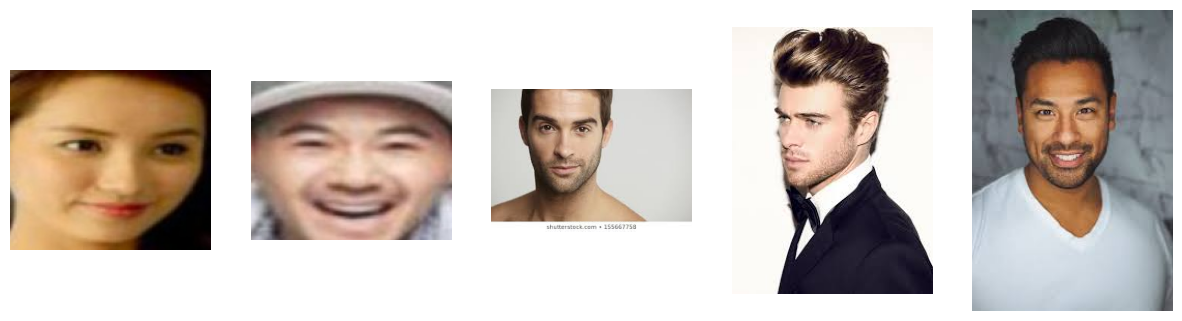

In [ ]:
#Test Your Zaka
import matplotlib.image as mpimg


with_mask_dir = os.path.join(training_path, 'without_mask')
image_files = os.listdir(with_mask_dir)
random_image_files = random.sample(image_files, 5)

plt.figure(figsize=(15, 10))
for i, image_file in enumerate(random_image_files):
    img_path = os.path.join(with_mask_dir, image_file)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

##Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
#Test Your Zaka
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(1, activation='sigmoid')])


model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train the model that you defined on the training data and evaluate it on the validation data. Feel free to tune the hyperparameters of your model until you reach a satisfying result on the validation set. </br>
**N.B:** Make sure to save the model training history in a variable to plot later the learning curve.

In [ ]:
#Test Your Zaka

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255)
validation_datagen = ImageDataGenerator( rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory('final_facemask_dataset/train',
                                                    batch_size=25,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory('final_facemask_dataset/validation',
                                                               batch_size=15,
                                                               class_mode='binary',
                                                               target_size=(150, 150))

history = model.fit(train_generator,
                    epochs=3,
                    verbose=1,
                    steps_per_epoch= 40,
                    validation_data=validation_generator,
                    validation_steps=14)


Found 1858 images belonging to 2 classes.
Found 398 images belonging to 2 classes.
Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9409 - loss: 0.1811 - val_accuracy: 0.8952 - val_loss: 0.2839
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 985ms/step - accuracy: 0.9396 - loss: 0.1486 - val_accuracy: 0.9521 - val_loss: 0.1645
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9611 - loss: 0.1013 - val_accuracy: 0.9238 - val_loss: 0.2590


Plot the accuracy curve and see if your model is overfit.

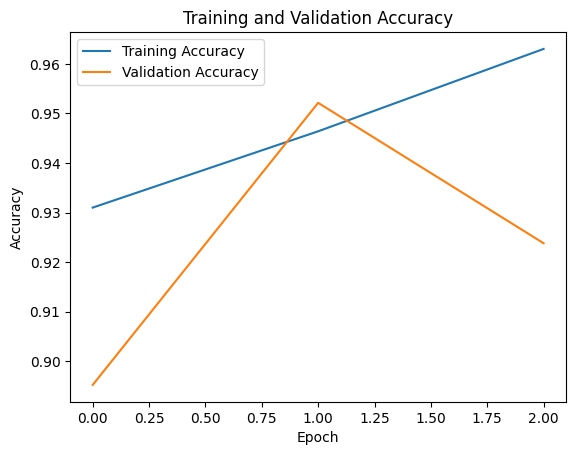

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

[The model is overfitting and its showing good work in the train batch but is struggling on the validation. maybe more parameters, data augumentation in training, data quality or making the model complixety less will fix this.]

##Evaluate the model


Now you will evaluate the model that you built on the testing set that you kept aside since the beginning.

In [ ]:
#Test Your Zaka
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/final_facemask_dataset/test',
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary',
    shuffle=False)

test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)

Found 197 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9137 - loss: 0.2729
Test accuracy: 0.9238578677177429
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step


Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

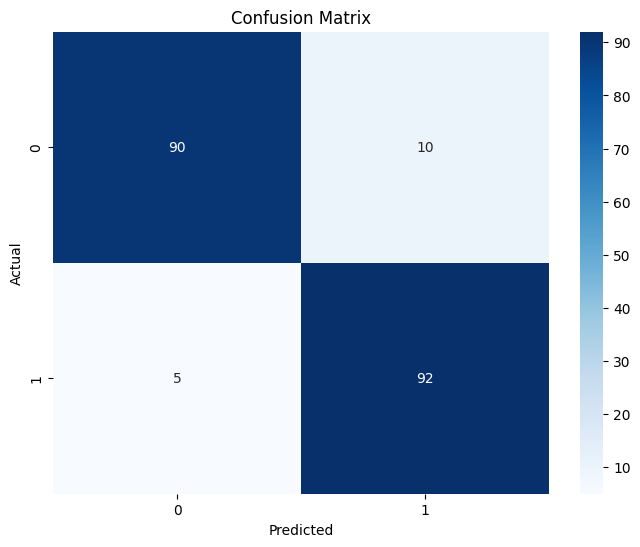

In [ ]:
#Test Your Zaka
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_generator.classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**What did you learn about your model from this confusion matrix?**

[I see that there ar falses positives and negatives in the test data, which is showing some hickups in the model. But overall, the model is performing good to the test data with accuracy 92%.]

##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


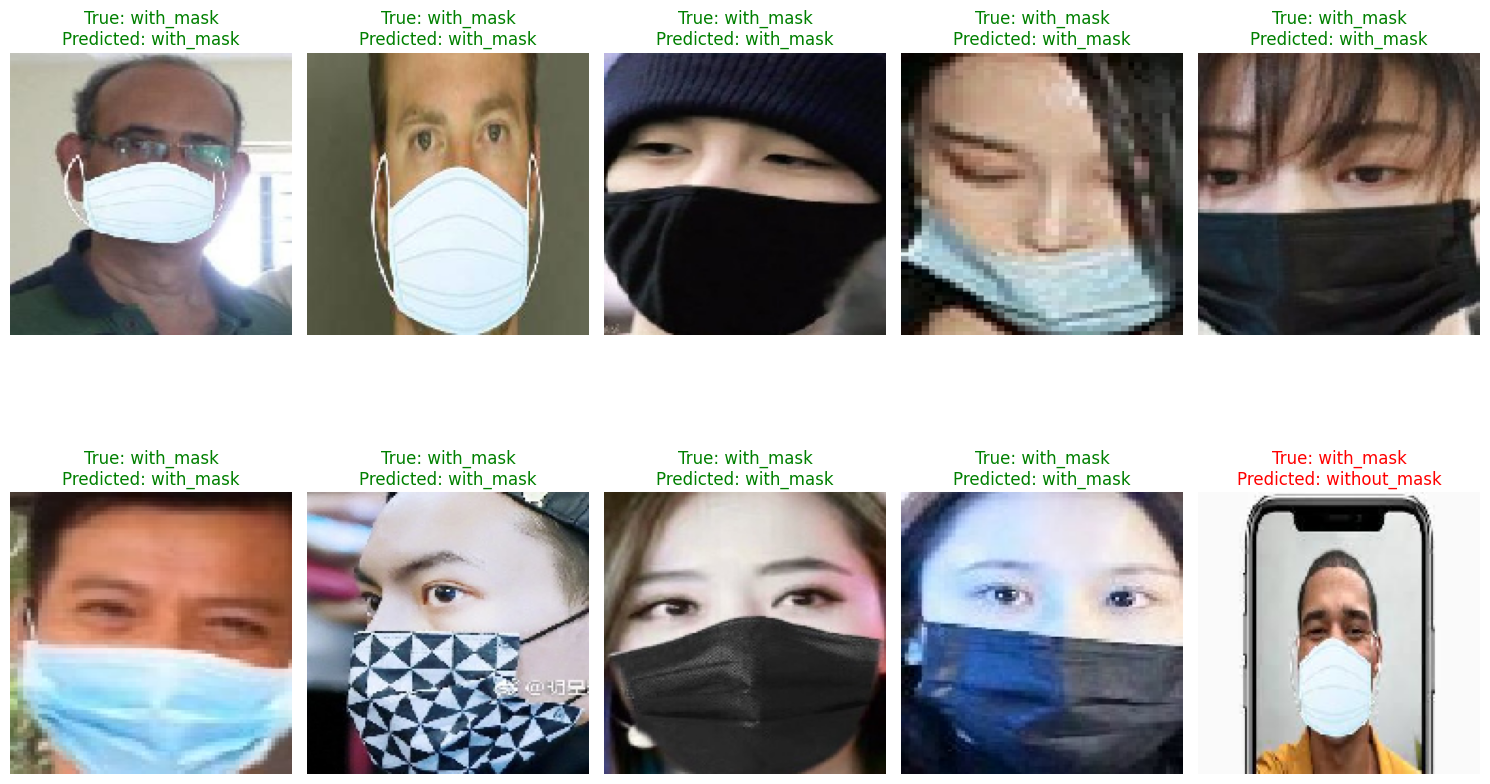

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
import numpy as np

test_generator.reset()
images, labels = next(test_generator)
predictions = model.predict(images)
predicted_classes = np.round(predictions)

plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')

    if predicted_classes[i] == 0:
        predicted_label = 'with_mask'
    else:
        predicted_label = 'without_mask'


    if labels[i] == 0:
        true_label = 'with_mask'
    else:
        true_label = 'without_mask'

    # Corrected the indentation here
    if predicted_label != true_label:
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color='red')
    else:
        plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color='green')

plt.tight_layout()
plt.show()

**Try to derive some conclusions from the wrong predictions that your model has made. Meaning: why do you think these predictions were wrong?**

[I see the struggle of the model with classifiying a with mask to false negative, it could be due to lighting & the angle. The picture looks in a different style than the rest (in a phone and shows the effect of overfitting) and the mask looks like a sticker rather than actual mask. ]

**Think of a way that you can use in order to improve the performance of your model, and implement it**

[**First:** More diverse training data, icludes images with varying lighting conditions, partial occlusions, and different mask types. **Second:** Data augmentation,by increasing the diversity of the training by applying techniques like rotation, flipping, zooming, and brightness adjustments, ]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255)
validation_datagen = ImageDataGenerator( rescale = 1.0/255)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20 )

train_generator = train_datagen.flow_from_directory('final_facemask_dataset/train',
                                                    batch_size=25,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory('final_facemask_dataset/validation',
                                                               batch_size=15,
                                                               class_mode='binary',
                                                               target_size=(150, 150))

history = model.fit(train_generator,
                    epochs=3,
                    verbose=1,
                    steps_per_epoch= 40,
                    validation_data=validation_generator,
                    validation_steps=14)


Found 1858 images belonging to 2 classes.
Found 398 images belonging to 2 classes.
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 5/40 ━━━━━━━━━━━━━━━━━━━━ 1:04 2s/step - accuracy: 0.8494 - loss: 0.3600

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8670 - loss: 0.3162 - val_accuracy: 0.9048 - val_loss: 0.2385
Epoch 2/3
35/40 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9076 - loss: 0.2409

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9061 - loss: 0.2423 - val_accuracy: 0.9096 - val_loss: 0.2176
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9143 - loss: 0.1998 - val_accuracy: 0.9048 - val_loss: 0.2406


**Your Friend took your code and ran it again, but obtained different accuracies on the different sets. How do you interpret this?**

[There was data shuffling function used in splitting the images during each epoch, which can  affect the training process. The order in which data is fed to the model can also impact the training. Finally, the neural networks are initialized with random weights; so different random initializations can lead to different model behaviors for my friend.]